In [41]:
import keras

In [42]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [43]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Data set/Train set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 158 images belonging to 2 classes.


In [47]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Data set/Test set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 87 images belonging to 2 classes.


In [48]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [49]:
model=Sequential()

In [50]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

In [51]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [53]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
 5/14 [=========>....................] - ETA: 19s - loss: 6.0172 - accuracy: 0.7089

14/14 [==============================] - 18s 1s/step - loss: 6.0172 - accuracy: 0.7089 - val_loss: 1.2413 - val_accuracy: 0.4598


In [54]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
model.save("/content/forestfire.h5")

In [58]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from twilio.rest import Client
from playsound import playsound
from tensorflow.keras.preprocessing import image

In [60]:
model=load_model("/content/forestfire.h5")
img=image.load_img('/content/drive/MyDrive/Data set/Test set/Forest with fire/599857.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [61]:
pred=model.predict(x)

1/1 [==============================] - 0s 73ms/step


In [62]:
pred

array([[0.]], dtype=float32)

In [63]:
model=load_model('/content/forestfire.h5')
video = cv2.VideoCapture(0)
name = ['forest','with fire']

In [64]:
account_sid = 'ACcfe9079086fa4780efd8b3c5bfbc0c4d'
auth_token = '0bfe2af7795ab731b695774505bbcaed'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
    body='forest fire is detected,stay alert',
#use twilio free number
    from_='+15732843524',
#to number
    to='+919363415593')
print(message.sid)

SM5d4c511d00d18c464b1ad66a89f12faf


In [65]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
%matplotlib inline

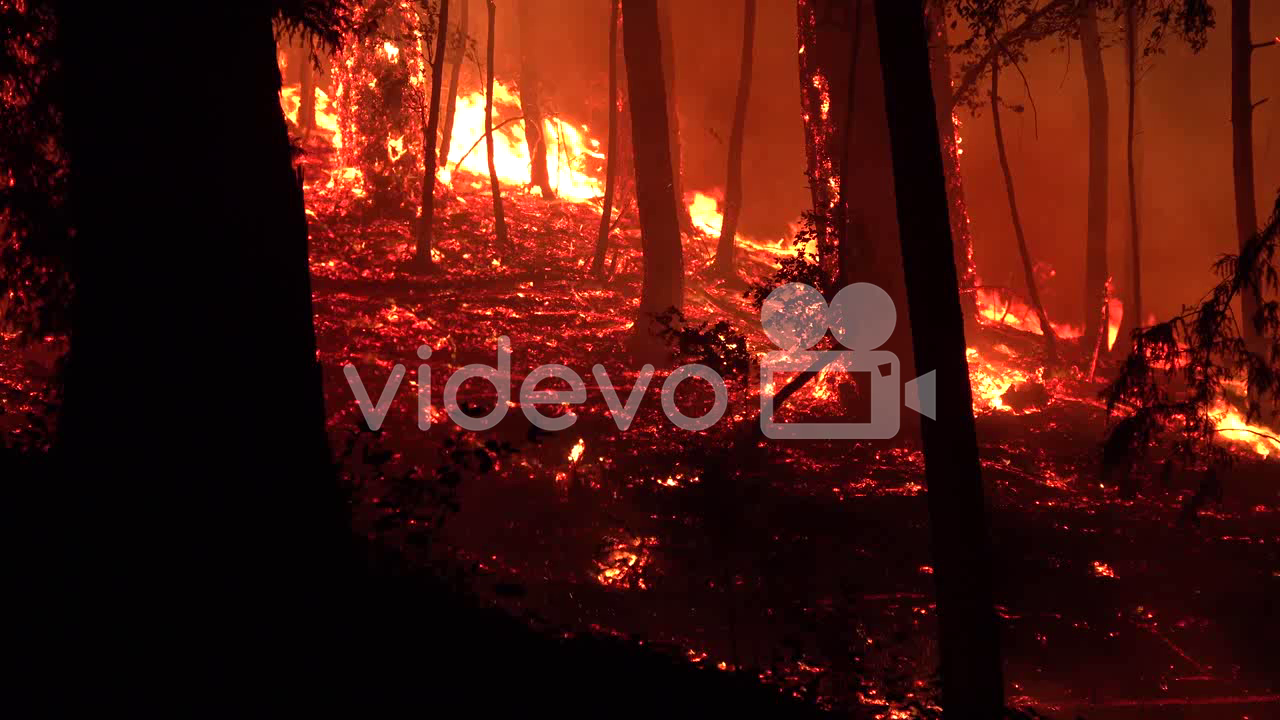

1/1 [==============================] - 0s 109ms/step
Forest fire
SMa36081e802034389d0235ef87d68e7ea
Fire detected
SMS Sent!


In [67]:
cap = cv2.VideoCapture(r'/content/625_625-0140_preview.mp4')
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forestfire.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==0:
  account_sid = 'ACcfe9079086fa4780efd8b3c5bfbc0c4d'
  auth_token = '0bfe2af7795ab731b695774505bbcaed'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+15732843524',
      #to number
      to='+919363415593')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")